In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Exploring HaGRID Dataset

In [79]:
df = pd.read_csv("hand_landmarks_data.csv")

In [80]:
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [53]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [54]:
df['label'].unique()

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

In [55]:
df.isna().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64

In [56]:
df.isna().sum().sum()

0

In [57]:
df['label'].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

# Visualizing the hand landmarks

In [58]:
row = df.iloc[[11480]]
#row = df.iloc[[6000]]
row

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
11480,278.986771,244.294017,1.833548e-07,262.584846,238.484642,-0.012291,248.78167,229.453519,-0.020595,238.278488,...,299.239471,199.822577,-0.037286,303.200317,192.854725,-0.041019,306.615715,186.865053,-0.043507,palm


In [59]:
x_values = [row[f'x{i}'].values[0] for i in range(1, 22)]
y_values = [row[f'y{i}'].values[0] for i in range(1, 22)]

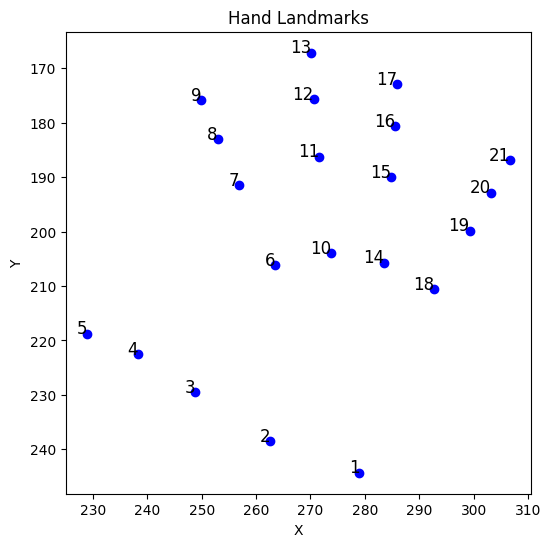

In [60]:
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, color='blue')

for i in range(21):
    plt.text(x_values[i], y_values[i], str(i+1), fontsize=12, ha='right')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Hand Landmarks")
plt.gca().invert_yaxis()  # Invert Y-axis (because image coordinates start from top-left)
plt.show()


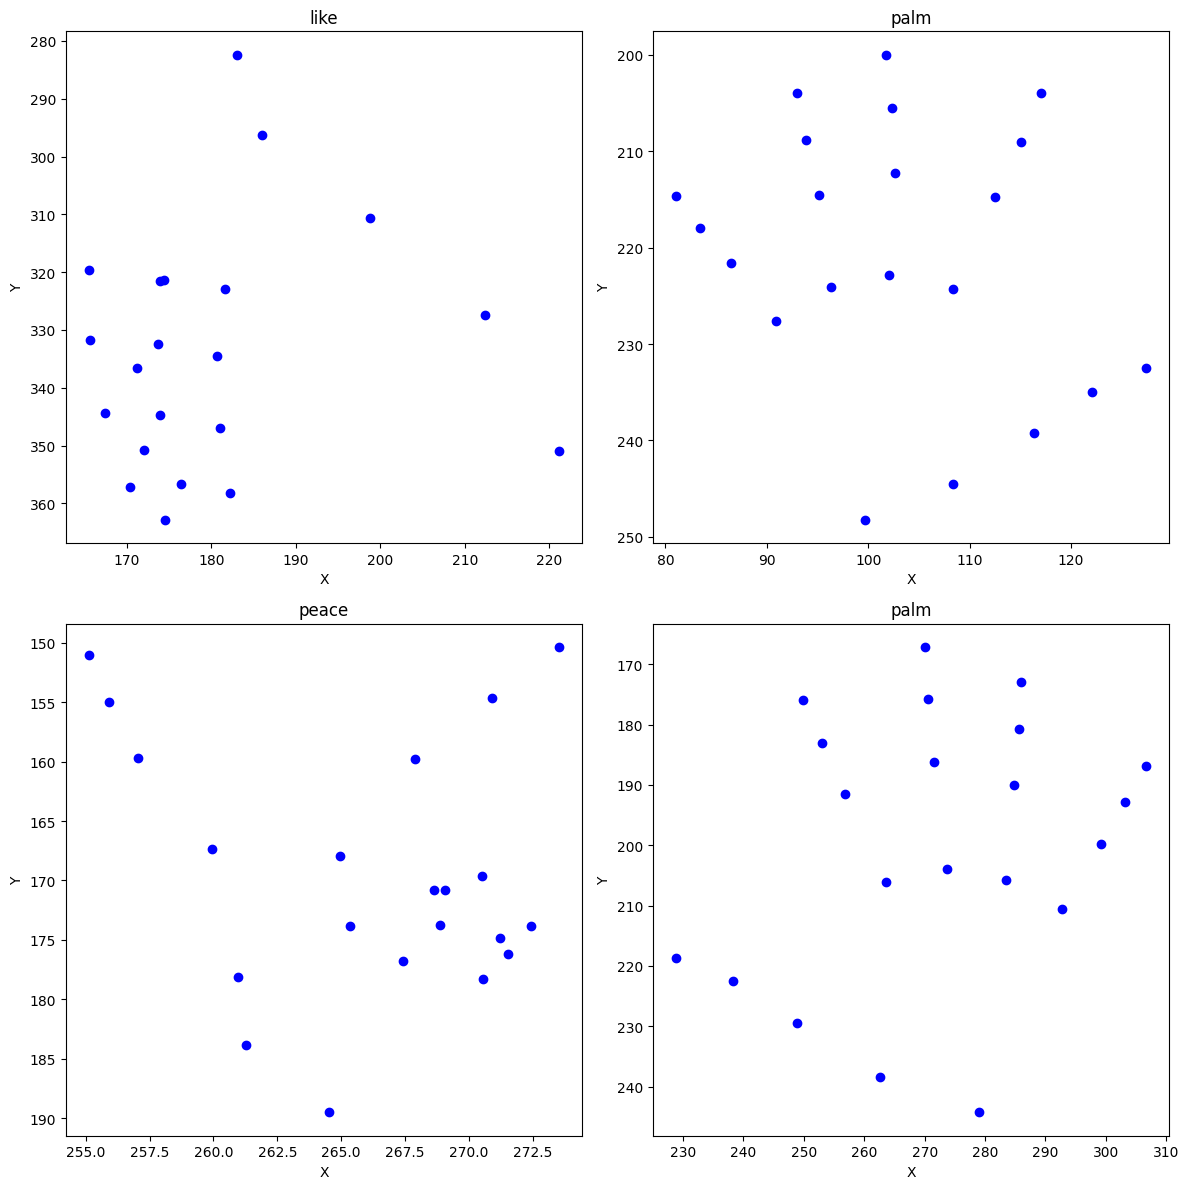

In [61]:
rows = df.iloc[[6000, 12000, 12500, 11480]]

plt.figure(figsize=(12, 12))

for idx, row in enumerate(rows.iterrows()):
    row_data = row[1] 

    x_values = [row_data[f'x{i}'] for i in range(1, 22)]
    y_values = [row_data[f'y{i}'] for i in range(1, 22)]

    plt.subplot(2, 2, idx + 1) 
    plt.scatter(x_values, y_values, color='blue')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"{row_data['label']}")
    plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Normalize the Dataset

In [ ]:
df_scaling = df.copy()

wrist_x = df_scaling['x1'].copy()
wrist_y = df_scaling['y1'].copy()

#Recenter the hand landmarks (x,y) to make the origin the wrist point
for i in range(1, 22):
    df_scaling[f'x{i}'] = df_scaling[f'x{i}'] - wrist_x
    df_scaling[f'y{i}'] = df_scaling[f'y{i}'] - wrist_y


#Divide all the landmarks by the mid-finger tip position.
mid_finger_tip_position = np.sqrt(df_scaling['x13']**2 + df_scaling['y13']**2)
for i in range(1, 22):
    df_scaling[f'x{i}'] = df_scaling[f'x{i}'] / mid_finger_tip_position
    df_scaling[f'y{i}'] = df_scaling[f'y{i}'] / mid_finger_tip_position


In [82]:
df_scaling.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486,call


# Visualizing the hand landmarks after Normalization

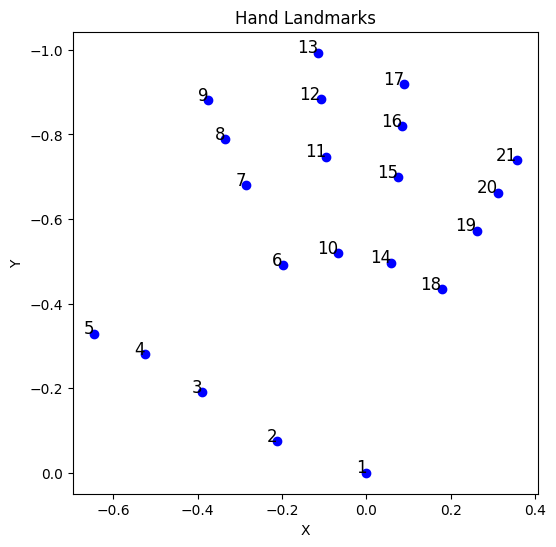

In [83]:
row = df_scaling.iloc[[11480]]
row
x_values = [row[f'x{i}'].values[0] for i in range(1, 22)]
y_values = [row[f'y{i}'].values[0] for i in range(1, 22)]
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, color='blue')

for i in range(21):
    plt.text(x_values[i], y_values[i], str(i+1), fontsize=12, ha='right')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Hand Landmarks")
plt.gca().invert_yaxis()  # Invert Y-axis (because image coordinates start from top-left)
plt.show()

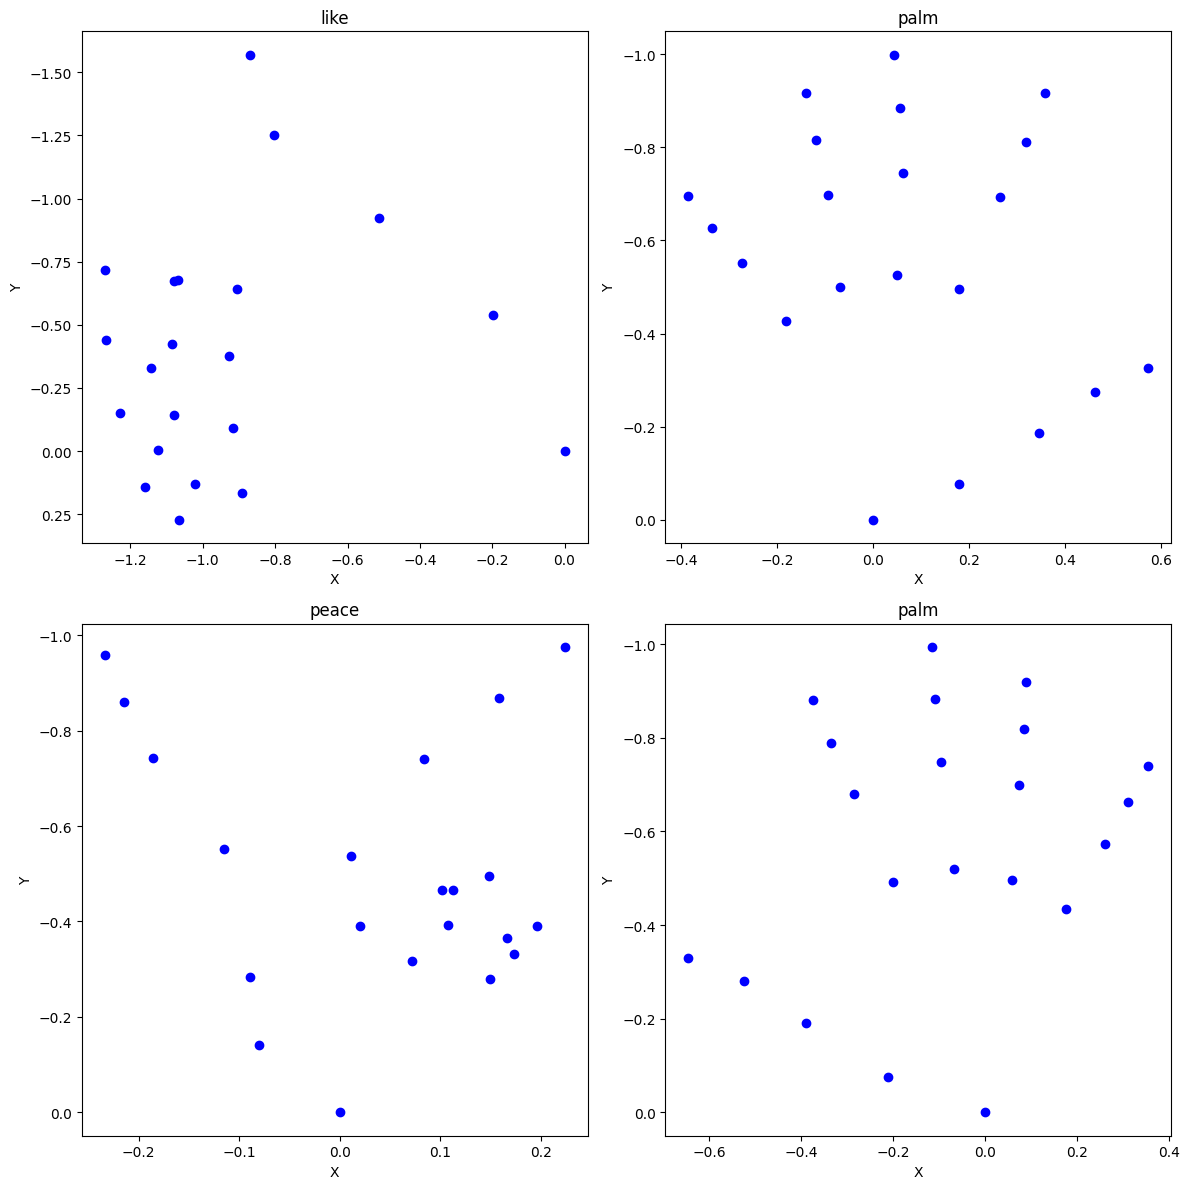

In [84]:
rows = df_scaling.iloc[[6000, 12000, 12500, 11480]]

plt.figure(figsize=(12, 12))

for idx, row in enumerate(rows.iterrows()):
    row_data = row[1] 

    x_values = [row_data[f'x{i}'] for i in range(1, 22)]
    y_values = [row_data[f'y{i}'] for i in range(1, 22)]

    plt.subplot(2, 2, idx + 1) 
    plt.scatter(x_values, y_values, color='blue')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"{row_data['label']}")
    plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Splitting into train/test sets

In [85]:
features = df_scaling.drop("label",axis=1)
labels = df_scaling["label"]

In [86]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features,labels,random_state=100,train_size=.8,test_size=.2)

# Trying different Classification Models

In [87]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial',max_iter=500,class_weight='balanced').fit(features_train,labels_train)
lr_model_score=lr_model.score(features_test,labels_test)
lr_model_ypred=lr_model.predict(features_test)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [88]:
# Train decision tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight='balanced').fit(features_train,labels_train)
dt_model_score=dt_model.score(features_test,labels_test)
dt_model_ypred=dt_model.predict(features_test)

In [89]:
# Train SVM model
from sklearn.svm import SVC

svm_model =SVC(class_weight='balanced').fit(features_train,labels_train)
svm_model_score=svm_model.score(features_test,labels_test)
svm_model_ypred=svm_model.predict(features_test)

In [90]:
# Train K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(features_train, labels_train)
knn_model_score = knn_model.score(features_test, labels_test)
knn_model_ypred = knn_model.predict(features_test)


In [91]:
# Train random forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced').fit(features_train,labels_train)
rf_model_score=rf_model.score(features_test,labels_test)
rf_model_ypred=rf_model.predict(features_test)

In [92]:
# Train gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

gb_model =GradientBoostingClassifier().fit(features_train,labels_train)
gb_model_score=gb_model.score(features_test,labels_test)
gb_model_ypred=gb_model.predict(features_test)

In [93]:
# Train Adaboost model
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier().fit(features_train,labels_train)
ab_model_score=ab_model.score(features_test,labels_test)
ab_model_ypred=ab_model.predict(features_test)

# Evaluating the models
Accuracy

In [94]:
print("Scores of the models")
print("Logistic regression:",lr_model_score )
print("Decision tree:",dt_model_score )
print("SVM:", svm_model_score)
print("KNN:", knn_model_score)
print("Random forest:",rf_model_score )
print("Gradient boosting:",gb_model_score )
print("AdaBoost:",ab_model_score )

Scores of the models
Logistic regression: 0.8502434274586174
Decision tree: 0.9548198636806232
SVM: 0.9226874391431353
KNN: 0.9774099318403116
Random forest: 0.9740993184031159
Gradient boosting: 0.9737098344693281
AdaBoost: 0.3176241480038948


F1-score

In [95]:
print("F1-scores of the models:")

print("Logistic regression:", f1_score(labels_test,lr_model_ypred,average="weighted"))

print("Decision tree:",f1_score(labels_test,dt_model_ypred,average="weighted") )

print("SVM:",f1_score(labels_test,svm_model_ypred,average="weighted") )

print("KNN:",f1_score(labels_test,knn_model_ypred,average="weighted") )

print("Random forest:",f1_score(labels_test,rf_model_ypred,average="weighted") )

print("Gradient boosting:",f1_score(labels_test,gb_model_ypred,average="weighted") )

print("AdaBoost:",f1_score(labels_test,ab_model_ypred,average="weighted") )

F1-scores of the models:
Logistic regression: 0.8493620417496096
Decision tree: 0.9547832507170422
SVM: 0.9224561936786391
KNN: 0.977433380120611
Random forest: 0.9741089805925246
Gradient boosting: 0.9737046672308522
AdaBoost: 0.23337351244984897


Precision

In [96]:
print("Precision of the models:")

print("Logistic regression:", precision_score(labels_test,lr_model_ypred,average="weighted"))

print("Decision tree:",precision_score(labels_test,dt_model_ypred,average="weighted") )

print("SVM:",precision_score(labels_test,svm_model_ypred,average="weighted") )

print("KNN:",precision_score(labels_test,knn_model_ypred,average="weighted") )

print("Random forest:",precision_score(labels_test,rf_model_ypred,average="weighted") )

print("Gradient boosting:",precision_score(labels_test,gb_model_ypred,average="weighted") )

print("AdaBoost:",precision_score(labels_test,ab_model_ypred,average="weighted") )

Precision of the models:
Logistic regression: 0.8509837134732173
Decision tree: 0.9548337347677737
SVM: 0.9274234516248826
KNN: 0.9776512298112771
Random forest: 0.9741955947877786
Gradient boosting: 0.9738023666699531
AdaBoost: 0.31810173243575873


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall

In [97]:
print("Recall of the models:")

print("Logistic regression:", recall_score(labels_test,lr_model_ypred,average="weighted"))

print("Decision tree:",recall_score(labels_test,dt_model_ypred,average="weighted") )

print("SVM:",recall_score(labels_test,svm_model_ypred,average="weighted") )

print("KNN:",recall_score(labels_test,knn_model_ypred,average="weighted") )

print("Random forest:",recall_score(labels_test,rf_model_ypred,average="weighted") )

print("Gradient boosting:",recall_score(labels_test,gb_model_ypred,average="weighted") )

print("AdaBoost:",recall_score(labels_test,ab_model_ypred,average="weighted") )

Recall of the models:
Logistic regression: 0.8502434274586174
Decision tree: 0.9548198636806232
SVM: 0.9226874391431353
KNN: 0.9774099318403116
Random forest: 0.9740993184031159
Gradient boosting: 0.9737098344693281
AdaBoost: 0.3176241480038948


# Grid search

SVM

In [118]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                }
# use gridsearch to find the best hyperparameters
svm = SVC(class_weight='balanced')
svm_gs = GridSearchCV(estimator=svm, param_grid=svm_parameters)

# git the best model
svm_winner =svm_gs.fit(features_train,labels_train)
svm_winner

svm_winner.score(features_test, labels_test)

0.986952288218111

In [119]:
svm_winner

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']})

K-Nearest Neighbors

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn_parameters = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

# use gridsearch to find the best hyperparameters
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(estimator=knn, param_grid=knn_parameters)

# Fit the best model
knn_winner = knn_gs.fit(features_train, labels_train)
knn_winner

knn_winner.score(features_test, labels_test)

0.9789678675754625

In [102]:
knn_winner

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

Random Forest

In [ ]:
rf_parameters = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [5, 10, 20, None],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples in a leaf node
    'bootstrap': [True, False]
}

# use gridsearch to find the best hyperparameters
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
rf_gs = GridSearchCV(estimator=rf, param_grid=rf_parameters)

# git the best model
rf_winner = rf_gs.fit(features_train, labels_train)
rf_winner

# Evaluate on validation set
rf_winner.score(features_test, labels_test)

0.9787068293949623

In [ ]:
rf_winner

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

# After Grid Search (with the chosen hyperparameters)

In [ ]:
# Train Support Vector Machine model with the best hyperparameters

svm_final =SVC(C=100, class_weight='balanced', gamma=0.1).fit(features_train,labels_train)
svm_final_model_score=svm_final.score(features_test,labels_test)
svm_final_model_ypred=svm_final.predict(features_test)

print("SVM accuracy : ",svm_final_model_score )
print("SVM f1_score : ",f1_score(labels_test,svm_final_model_ypred,average="weighted") )
print("SVM recall_score : ",recall_score(labels_test,svm_final_model_ypred,average="weighted") )
print("SVM precision_score :",precision_score(labels_test,svm_final_model_ypred,average="weighted") )

SVM accuracy :  0.986952288218111
SVM f1_score :  0.9869494247157545
SVM recall_score :  0.986952288218111
SVM precision_score : 0.9870151291975905


In [ ]:
# Train K-Nearest Neighbors model with the best hyperparameters

knn_model_final = KNeighborsClassifier(metric='euclidean', n_neighbors=3).fit(features_train, labels_train)
knn_final_model_score = knn_model_final.score(features_test, labels_test)
knn_final_model_ypred = knn_model_final.predict(features_test)

print("KNN accuracy : ",knn_final_model_score )
print("KNN f1_score : ",f1_score(labels_test,knn_final_model_ypred,average="weighted") )
print("KNN recall_score : ",recall_score(labels_test,knn_final_model_ypred,average="weighted") )
print("KNN precision_score :",precision_score(labels_test,knn_final_model_ypred,average="weighted") )

KNN accuracy :  0.9789678675754625
KNN f1_score :  0.9789807656586312
KNN recall_score :  0.9789678675754625
KNN precision_score : 0.9792503712146893


In [105]:
# Train random forest model with the best hyperparameters

rf_model_final = RandomForestClassifier(bootstrap=False, class_weight='balanced',n_estimators=200, random_state=42).fit(features_train,labels_train)
rf_final_model_score=rf_model_final.score(features_test,labels_test)
rf_final_model_ypred=rf_model_final.predict(features_test)

print("RF accuracy : ",knn_final_model_score)
print("RF f1_score : ",f1_score(labels_test,knn_final_model_ypred,average="weighted") )
print("RF recall_score : ",recall_score(labels_test,knn_final_model_ypred,average="weighted") )
print("RF precision_score :",precision_score(labels_test,knn_final_model_ypred,average="weighted") )

RF accuracy :  0.9789678675754625
RF f1_score :  0.9789807656586312
RF recall_score :  0.9789678675754625
RF precision_score : 0.9792503712146893


# Saving svm_winner model

In [123]:
import joblib
joblib.dump(svm_winner,"svm_winner.pkl")

['svm_winner.pkl']

# Conclusion 

1️⃣ Table: Before GridSearch
| Model                | Accuracy (Before) | F1-Score (Before) | Precision (Before) | Recall (Before) |
|----------------------|------------------|-------------------|--------------------|-----------------|
| Logistic Regression | 0.8502           | 0.8494            | 0.8510             | 0.8502          |
| Decision Tree       | 0.9548           | 0.9548            | 0.9548             | 0.9548          |
| SVM                | 0.9227           | 0.9225            | 0.9274             | 0.9227          |
| KNN                | 0.9774           | 0.9774            | 0.9777             | 0.9774          |
| Random Forest      | 0.9741           | 0.9741            | 0.9742             | 0.9741          |
| Gradient Boosting  | 0.9737           | 0.9737            | 0.9738             | 0.9737          |
| AdaBoost           | 0.3176           | 0.2334            | 0.3181             | 0.3176          |



1️⃣ Table: After GridSearch
| Model  | Accuracy (After) | F1-Score (After) | Precision (After) | Recall (After) |
|--------|-----------------|------------------|-------------------|----------------|
| SVM    | 0.9870          | 0.9869           | 0.9870            | 0.9870         |
| KNN    | 0.9790          | 0.9790           | 0.9793            | 0.9790         |
| Random Forest | 0.9790    | 0.9790           | 0.9793            | 0.9790         |


# Testing the model

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import joblib  # For loading the trained SVM model

# Load the trained SVM model
svm_model = joblib.load("svm_winner.pkl")

# Initialize Mediapipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Start video capture
cap = cv2.VideoCapture(0)

# Get frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define codec and create VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
out = cv2.VideoWriter("output.mp4", fourcc, 30, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Flip the frame horizontally for a mirrored effect
    frame = cv2.flip(frame, 1)

    # Convert BGR to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(rgb_frame)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Extract (x, y, z) coordinates
            landmarks = np.array([(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark])

            # Normalize: Recenter based on wrist position (landmark 0)
            wrist_x, wrist_y, wrist_z = landmarks[0]
            landmarks[:, 0] -= wrist_x  
            landmarks[:, 1] -= wrist_y  

            # Scale only x and y using the mid-finger tip (landmark 12)
            mid_finger_x, mid_finger_y, _ = landmarks[12] 
            scale_factor = np.sqrt(mid_finger_x**2 + mid_finger_y**2)
            landmarks[:, 0] /= scale_factor  
            landmarks[:, 1] /= scale_factor  

            # Flatten the features for SVM
            features = landmarks.flatten().reshape(1, -1)

            # Predict using SVM
            prediction = svm_model.predict(features)[0]

            # Draw landmarks on the frame
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Display the prediction on the frame
            cv2.putText(frame, f'Prediction: {prediction}', (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)


    # Write the flipped frame to the video file
    out.write(frame)

    # Show the flipped frame
    cv2.imshow("Hand Gesture Recognition", frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()  # Ensure video is saved properly
cv2.destroyAllWindows()


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, 